In [2]:
import sqlite3
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

In [3]:
conn = sqlite3.connect("minion_1016_sqlite.db")
cur = conn.cursor()

In [4]:
cur.execute("""select fieldRA, fieldDEC, filter, expMJD, visitTime, visitExpTime, airmass, lst, altitude, azimuth, dist2Moon, solarElong, moonRA, moonDEC, moonAlt, moonAZ, moonPhase, sunAlt, sunAZ, phaseAngle, rScatter, mieScatter, moonBright, rawSeeing, wind, humidity, ditheredRA, ditheredDEC from summary limit 250000""")
features = cur.fetchall()


In [5]:
cur.execute("""select filtskybrightness from summary limit 250000""")
targets = cur.fetchall()

In [6]:
features = np.asarray(features)
features[features == 'u'] = 0
features[features == 'g'] = 1
features[features == 'r'] = 2
features[features == 'i'] = 3
features[features == 'z'] = 4
features[features == 'b'] = 5
features[features == 'y'] = 6
targets = np.asarray(targets)[:,0]

In [7]:
RFreg = RandomForestRegressor().fit(features, targets)

In [8]:
cur.execute("""select fieldRA, fieldDEC, filter, expMJD, visitTime, visitExpTime, airmass, lst, altitude, azimuth, dist2Moon, solarElong, moonRA, moonDEC, moonAlt, moonAZ, moonPhase, sunAlt, sunAZ, phaseAngle, rScatter, mieScatter, moonBright, rawSeeing, wind, humidity, ditheredRA, ditheredDEC from summary order by obshistid desc limit 250000""")
testfeatures = cur.fetchall()

In [9]:
cur.execute("""select filtskybrightness from summary order by obshistid desc limit 250000""")
testtargets = cur.fetchall()

In [10]:
testfeatures = np.asarray(testfeatures)
testfeatures[testfeatures == 'u'] = 0
testfeatures[testfeatures == 'g'] = 1
testfeatures[testfeatures == 'r'] = 2
testfeatures[testfeatures == 'i'] = 3
testfeatures[testfeatures == 'z'] = 4
testfeatures[testfeatures == 'b'] = 5
testfeatures[testfeatures == 'y'] = 6
testtargets = np.asarray(testtargets)[:,0]

In [11]:
testpreds = RFreg.predict(testfeatures)

In [12]:
difference = testtargets-testpreds

In [13]:
RMSE = ((sum(difference**2))/250000)**.5

<bound method Figure.tight_layout of <Figure size 432x288 with 1 Axes>>

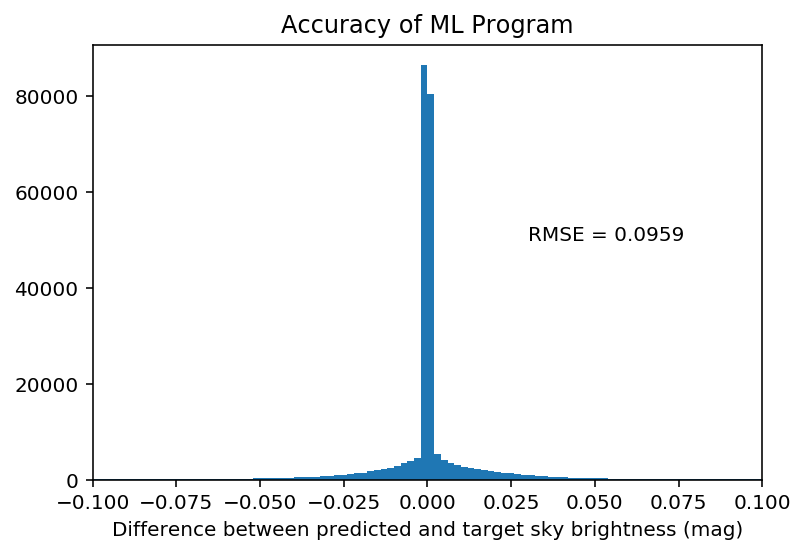

In [24]:
fig, ax = plt.subplots()

ax.hist(difference,bins=100, range = (-0.1,0.1) )
ax.set_xlabel("Difference between predicted and target sky brightness (mag)")
ax.set_xlim(-0.1,0.1)
ax.text(0.03,50000,f"RMSE = {RMSE:1.3}")
ax.set_title("Accuracy of ML Program")
fig.patch.set_facecolor('xkcd:white')

fig.tight_layout

In [15]:
cur.execute("""select filtskybrightness from summary order by obshistid desc limit 250000""")
filtskybrightness = cur.fetchall()


In [16]:
filtskybrightness = np.asarray(filtskybrightness)[:,0]

<bound method Figure.tight_layout of <Figure size 432x288 with 1 Axes>>

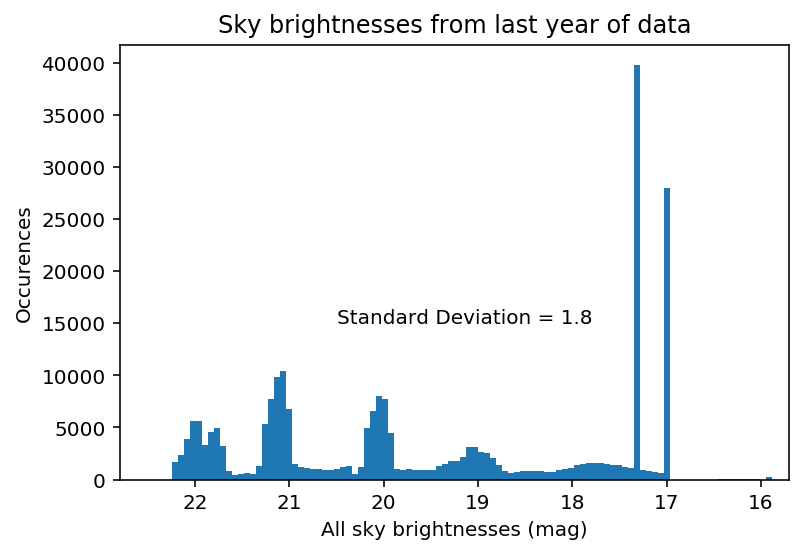

In [26]:
fig, ax = plt.subplots()

ax.hist(filtskybrightness, bins = 100)
ax.set_xlabel("All sky brightnesses (mag)")
ax.set_ylabel("Occurences")
ax.text(20.5,15000,f"Standard Deviation = {np.std(filtskybrightness):1.3}")
ax.set_title("Sky brightnesses from last year of data")
fig.patch.set_facecolor('xkcd:white')
ax.set_xlim(22.8,15.7)

fig.tight_layout

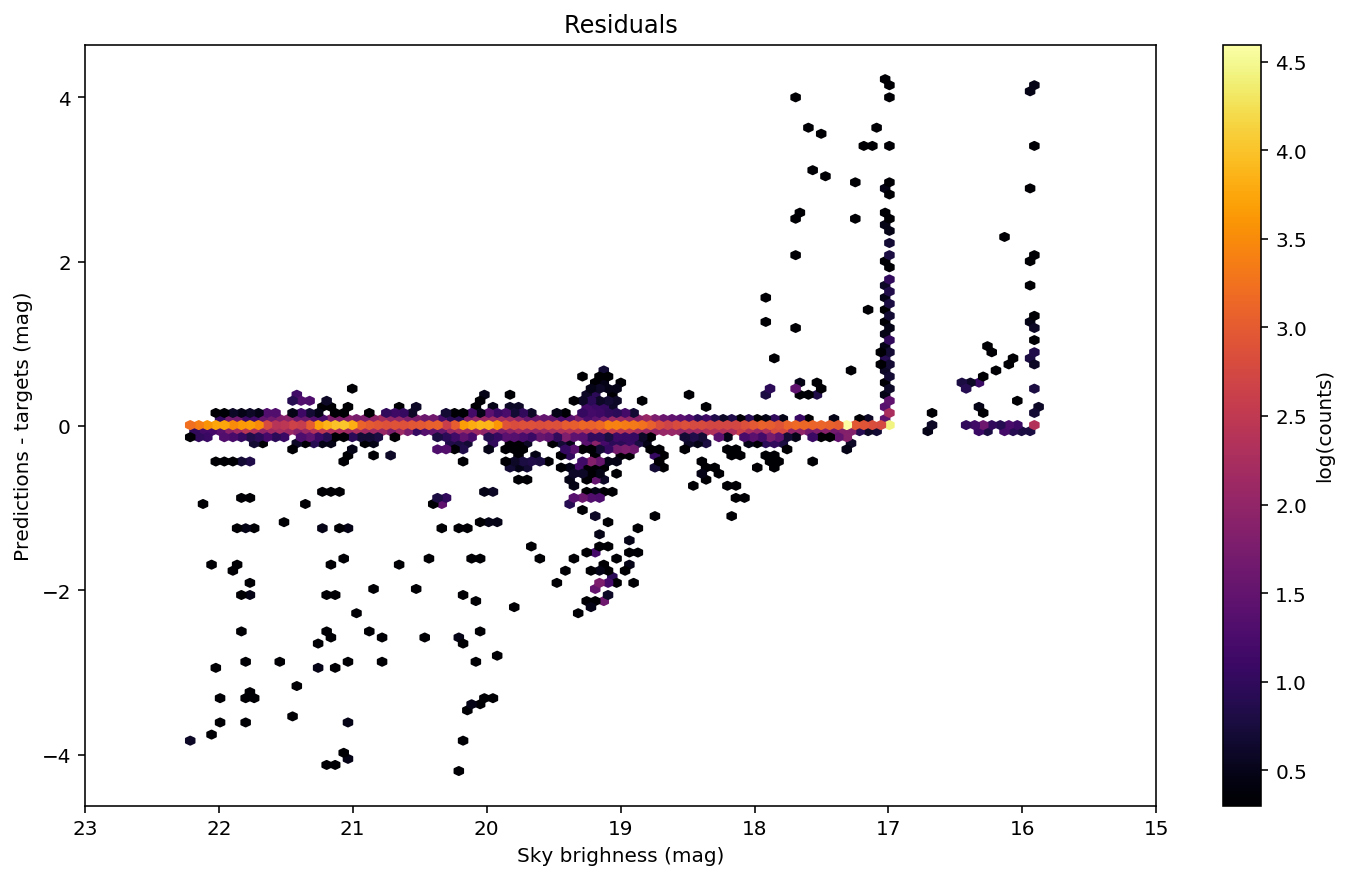

In [46]:
fig, ax = plt.subplots(figsize = (12,7))

hb = ax.hexbin(filtskybrightness,(difference)*-1,mincnt = 1, cmap = 'inferno', bins = 'log')
ax.set_xlabel("Sky brighness (mag)")
ax.set_ylabel("Predictions - targets (mag)")
ax.set_title("Residuals")
ax.set_xlim(23,15)
fig.patch.set_facecolor('xkcd:white')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log(counts)')

In [47]:
len(np.where(np.abs(difference)>1)[0])

401

In [48]:
len(np.where(np.abs(difference)>2)[0])

153

In [49]:
len(np.where(np.abs(difference)>3)[0])

44

In [50]:
len(np.where(np.abs(difference)>4)[0])

13